# 1. Generators of missing values
## 1.1. Import all needed packages

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from fireman_imputation.src.utils import MCARgen
from fireman_imputation.src.utils import MCARgen_cont

## 1.2. Main
### 1.2.1 Load the data

In [5]:
# load the data
data_orig = pd.read_csv('data/spam.csv',index_col=False)
data = data_orig.values

### 1.2.2 Missing value generator usage

In [16]:
probability = 0.1
cont_segments = [1, 3, 4, 10]
cont_segments_distrib = [0.1, 0.2, 0.2 , 0.5]
# MCAR
data_mcar, mask = MCARgen(data, probability)
# MCAR with continuous segments
data_mcar_cont, mask_cont = MCARgen_cont(data, probability, cont_segments, cont_segments_distrib)

### 1.2.3 Check if magnitude of missing values is approx probability

In [34]:
MCAR_frac = np.isnan(data_mcar).sum()/data_mcar.size
MCAR_cont_frac = np.isnan(data_mcar_cont).sum()/data_mcar_cont.size
print('Fraction of missing values in dataset:\nMCAR = {}\nMCAR_cont = {}'.format(MCAR_frac, MCAR_cont_frac))

Fraction of missing values in dataset:
MCAR = 0.09958552107284076
MCAR_cont = 0.0999248828439279


## 1.3. Visualize generated missing data

In [24]:
# cut out small portion of dataset for better visualization
val_cut = 500
data_orig_cut = data_orig[:val_cut].copy()
data_mcar_cut = data_mcar[:val_cut].copy()
data_mcar_cont_cut = data_mcar_cont[:val_cut].copy()

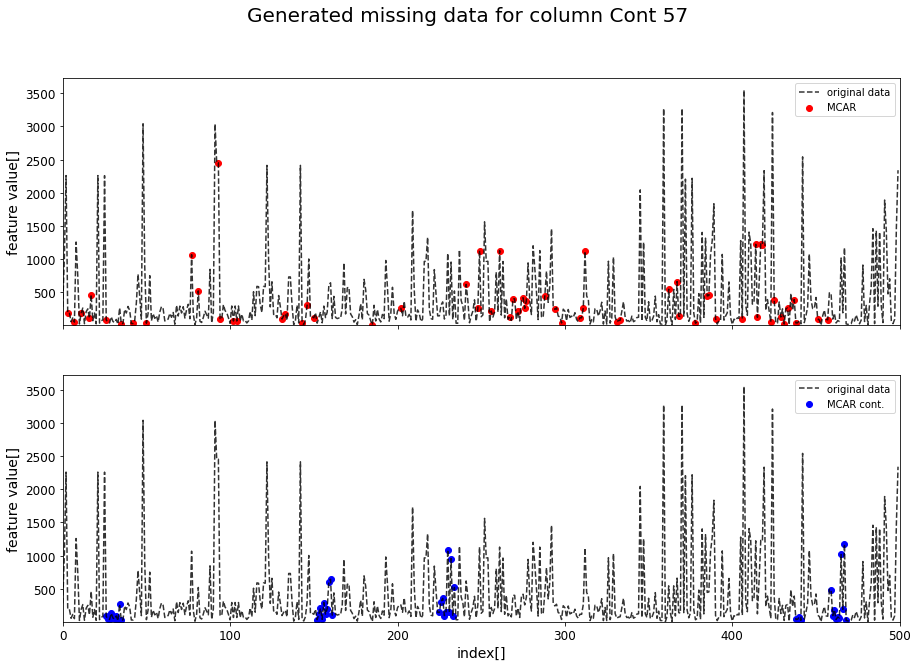

In [28]:
def apply_ax_conf(ax):
    ax.set_xlim([0,len(data_orig_cut)])
    ax.set_ylim([data_orig[column].min()*0.95,data_orig_cut[column].max()*1.05])
    ax.tick_params(labelsize=12)
    ax.set_xlabel('index[]',size=14)
    ax.set_ylabel('feature value[]',size=14)
    ax.legend()

column = 'Cont 57'
fig, ax = plt.subplots(2, 1, figsize=(15, 10), sharex=True)
fig.suptitle('Generated missing data for column ' + column, size=20)

data_orig_cut[column].plot(ax=ax[0], style='--', alpha=0.8, color='black', label='original data')
data_orig_cut[column].plot(ax=ax[1], style='--', alpha=0.8, color='black', label='original data')

col_int = data_orig_cut.columns.get_loc(column)

x_mcar = np.where(np.isnan(data_mcar_cut[:,col_int]))[0]
y_mcar = data_orig_cut.iloc[x_mcar,col_int]
ax[0].scatter(x_mcar, y_mcar, color='red', label='MCAR')
apply_ax_conf(ax[0])

x_mcar_cont = np.where(np.isnan(data_mcar_cont_cut[:,col_int]))[0]
y_mcar_cont = data_orig_cut.iloc[x_mcar_cont,col_int]
ax[1].scatter(x_mcar_cont, y_mcar_cont, color='blue', label='MCAR cont.')
apply_ax_conf(ax[1])